### Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals and Objectives

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which the model should be able to adjust to if the company's requirement changes in the future so we will need to handle these as well.

### Step 1: Importing Python Libraries

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Important libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Reading the data
Lead_data = pd.read_csv('Leads.csv')

### Step 2: Inspecting the Dataframe

In [4]:
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
Lead_data.shape

(9240, 37)

In [6]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3: Data Cleaning

In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected)

Lead_data = Lead_data.replace('Select', np.nan)

In [9]:
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Dropping some redundant columns

red_col=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','City']
Data=Lead_data.drop(red_col,1)

In [11]:
Data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Ringing,Not Sure,No,No,NaN,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,Will revert after reading the email,Might be,No,No,NaN,02.Medium,01.High,15.0,18.0,Modified


In [12]:
Data.shape

(9240, 31)

In [13]:
# Check for missing values

round(Data.isnull().sum()/len(Data)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [14]:
Data.shape

(9240, 31)

In [15]:
# Dropping Columns having more than 30% of missing values

drop_cols=Data.isnull().sum()
drop_cols=drop_cols[drop_cols.values/len(Data)>0.30]
len(drop_cols)

9

In [16]:
drop_cols

Specialization                        3380
How did you hear about X Education    7250
Tags                                  3353
Lead Quality                          4767
Lead Profile                          6855
Asymmetrique Activity Index           4218
Asymmetrique Profile Index            4218
Asymmetrique Activity Score           4218
Asymmetrique Profile Score            4218
dtype: int64

In [17]:
# Dropping these columns and checking the remaining columns for missing values

drop_columns=list(drop_cols.keys())
Data=Data.drop(drop_columns,1)  
round(Data.isnull().sum()/len(Data)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [18]:
Data.shape

(9240, 22)

In [19]:

Data['What matters most to you in choosing a course'] = Data['What matters most to you in choosing a course'].fillna('Not Provided')
Data['What is your current occupation'] = Data['What is your current occupation'].fillna('Not Provided')
Data['Lead Source'] = Data['Lead Source'].fillna('Not Provided')
Data['TotalVisits'] = Data['TotalVisits'].fillna('0.0')
Data['Page Views Per Visit'] = Data['Page Views Per Visit'].fillna('0.0')
Data['Last Activity'] = Data['Last Activity'].fillna('Not Provided')

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   object
 3   Do Not Call                                    9240 non-null   object
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [20]:
# chekcing for missing values after imputing values to the missing area

Data.isnull().sum()  

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

### Step 4: EDA

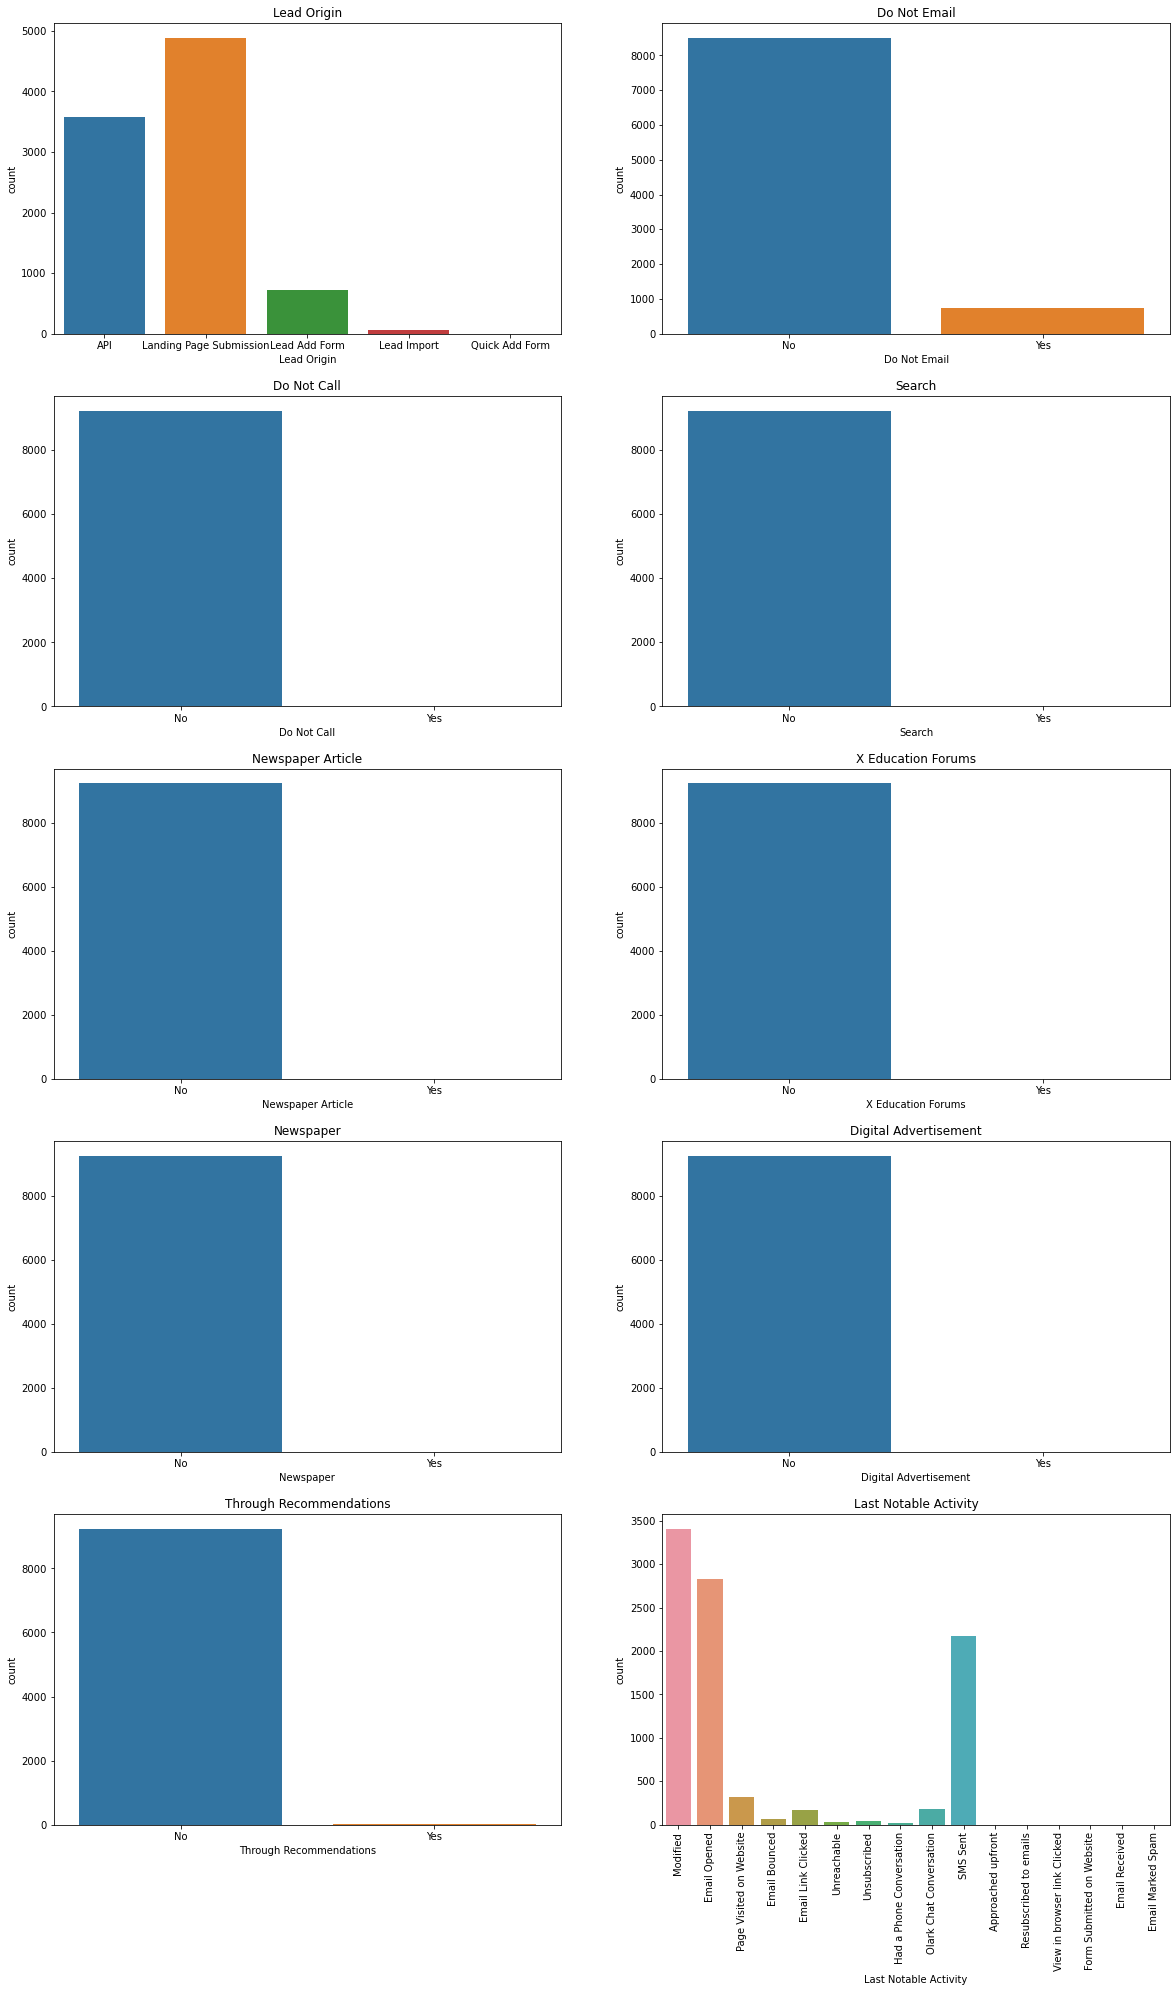

In [21]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(Data['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(Data['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(Data['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(Data['Search'])
plt.title('Search')

plt.subplot(6,2,5)
sns.countplot(Data['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,6)
sns.countplot(Data['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(Data['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(Data['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(Data['Through Recommendations'])
plt.title('Through Recommendations')


plt.subplot(6,2,10)
sns.countplot(Data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

### Step 5: Data Prepration

In [22]:
# Yes : 1 , No : 0

category={"No":0,"Yes":1}    # creating dictionary for two categories

# Column 'Do Not Email'

Data['Do Not Email']=Data['Do Not Email'].map(category)

# Column 'Do Not Call'

Data['Do Not Call']=Data['Do Not Call'].map(category)

# Column 'Search'

Data['Search']=Data['Search'].map(category)

# Column 'Magazine'

Data['Magazine']=Data['Magazine'].map(category)

# Column 'Newspaper Article'

Data['Newspaper Article']=Data['Newspaper Article'].map(category)

# Column 'X Education Forums'

Data['X Education Forums']=Data['X Education Forums'].map(category)

# Column 'Newspaper'

Data['Newspaper']=Data['Newspaper'].map(category)

# Column 'Digital Advertisement'

Data['Digital Advertisement']=Data['Digital Advertisement'].map(category)

# Column 'Through Recommendations'

Data['Through Recommendations']=Data['Through Recommendations'].map(category)

# Column 'Receive More Updates About Our Courses'

Data['Receive More Updates About Our Courses']=Data['Receive More Updates About Our Courses'].map(category)

# Column 'Update me on Supply Chain Content'

Data['Update me on Supply Chain Content']=Data['Update me on Supply Chain Content'].map(category)

# Column 'Get updates on DM Content'

Data['Get updates on DM Content']=Data['Get updates on DM Content'].map(category)

In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

#### Creating Dummy variables

In [24]:
# Creating a dummy variables for 8 categories and dropping the first level.

dummy=pd.get_dummies(Data[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

# Adding these dummies to our original dataset

Data=pd.concat([Data,dummy],axis=1)

Data.shape

(9240, 88)

In [25]:
# Removing the original column

duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']
Data=Data.drop(duplicates,1)
Data.shape

(9240, 82)

In [26]:
# Dropping redundant variables

redundant=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']
Data=Data.drop(redundant,1)

In [27]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 78 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Do Not Email                                                             9240 non-null   int64 
 1   Do Not Call                                                              9240 non-null   int64 
 2   Converted                                                                9240 non-null   int64 
 3   TotalVisits                                                              9240 non-null   object
 4   Total Time Spent on Website                                              9240 non-null   int64 
 5   Page Views Per Visit                                                     9240 non-null   object
 6   Search                                                                   9240 no

In [28]:
Data.shape

(9240, 78)

In [29]:
# Converting some categories to numercial as they are imported as an 'Object'

Data[['TotalVisits','Page Views Per Visit']]=Data[['TotalVisits','Page Views Per Visit']].apply(pd.to_numeric, errors='coerce')

Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 78 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

### Outlier Analysis

In [30]:
round(Data.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,...,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,...,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,...,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,0.00,0.00,2.00,98.00,1.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55%,0.00,0.00,0.00,3.00,305.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,5.00,936.00,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,0.00,1.00,10.00,1562.00,6.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


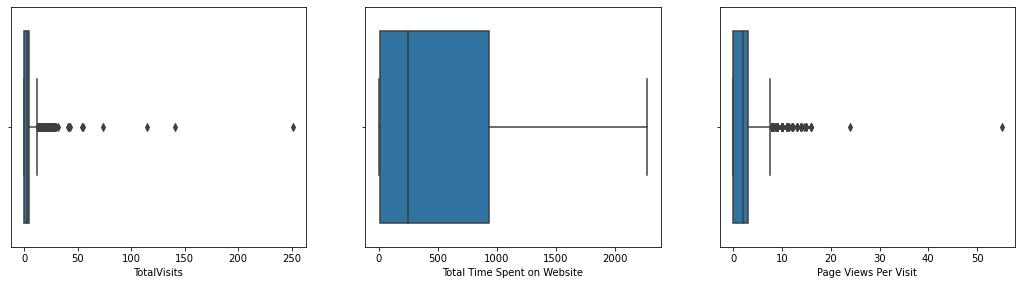

In [31]:
#Creating boxplots

plt.figure(figsize = (18,15))
cols = col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

for i in range(3):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=Data[col[i]],data=Data)
plt.show()

We can see that there are outliers in TotalVisits and Page Views Per Visit columns but dropping these outliers is not feasible as per our business problem. Hence we will create bins.

In [32]:
# For 'TotalVisits' variable

# As we have range from 0 to 251 for'TotalVisits' variable

ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    Data[list(ranges_total_visits.keys())[i]]=Data['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [33]:
# For 'Page Views Per Visit' variable

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits_1.keys()))):
    Data[list(ranges_total_visits_1.keys())[i]]=Data['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

In [34]:
redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

Data=Data.drop(redundant,axis=1)

Data.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


### Step 6: Test-Train Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Separating target varaible from dependent variable

y=Data['Converted']     # putting target varaible 'Converted' to a new series 'y'
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [37]:
# Putting dependent variable in a new dataset called 'X'

X=Data.drop('Converted',1)
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [38]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 7: Rescaling the features 

In [39]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  # Creating an object

In [40]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.214349,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3516,0,0,0.046655,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,0,0,0.541373,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3934,0,0,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [41]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.53896103896104

#### Looking at Correlations

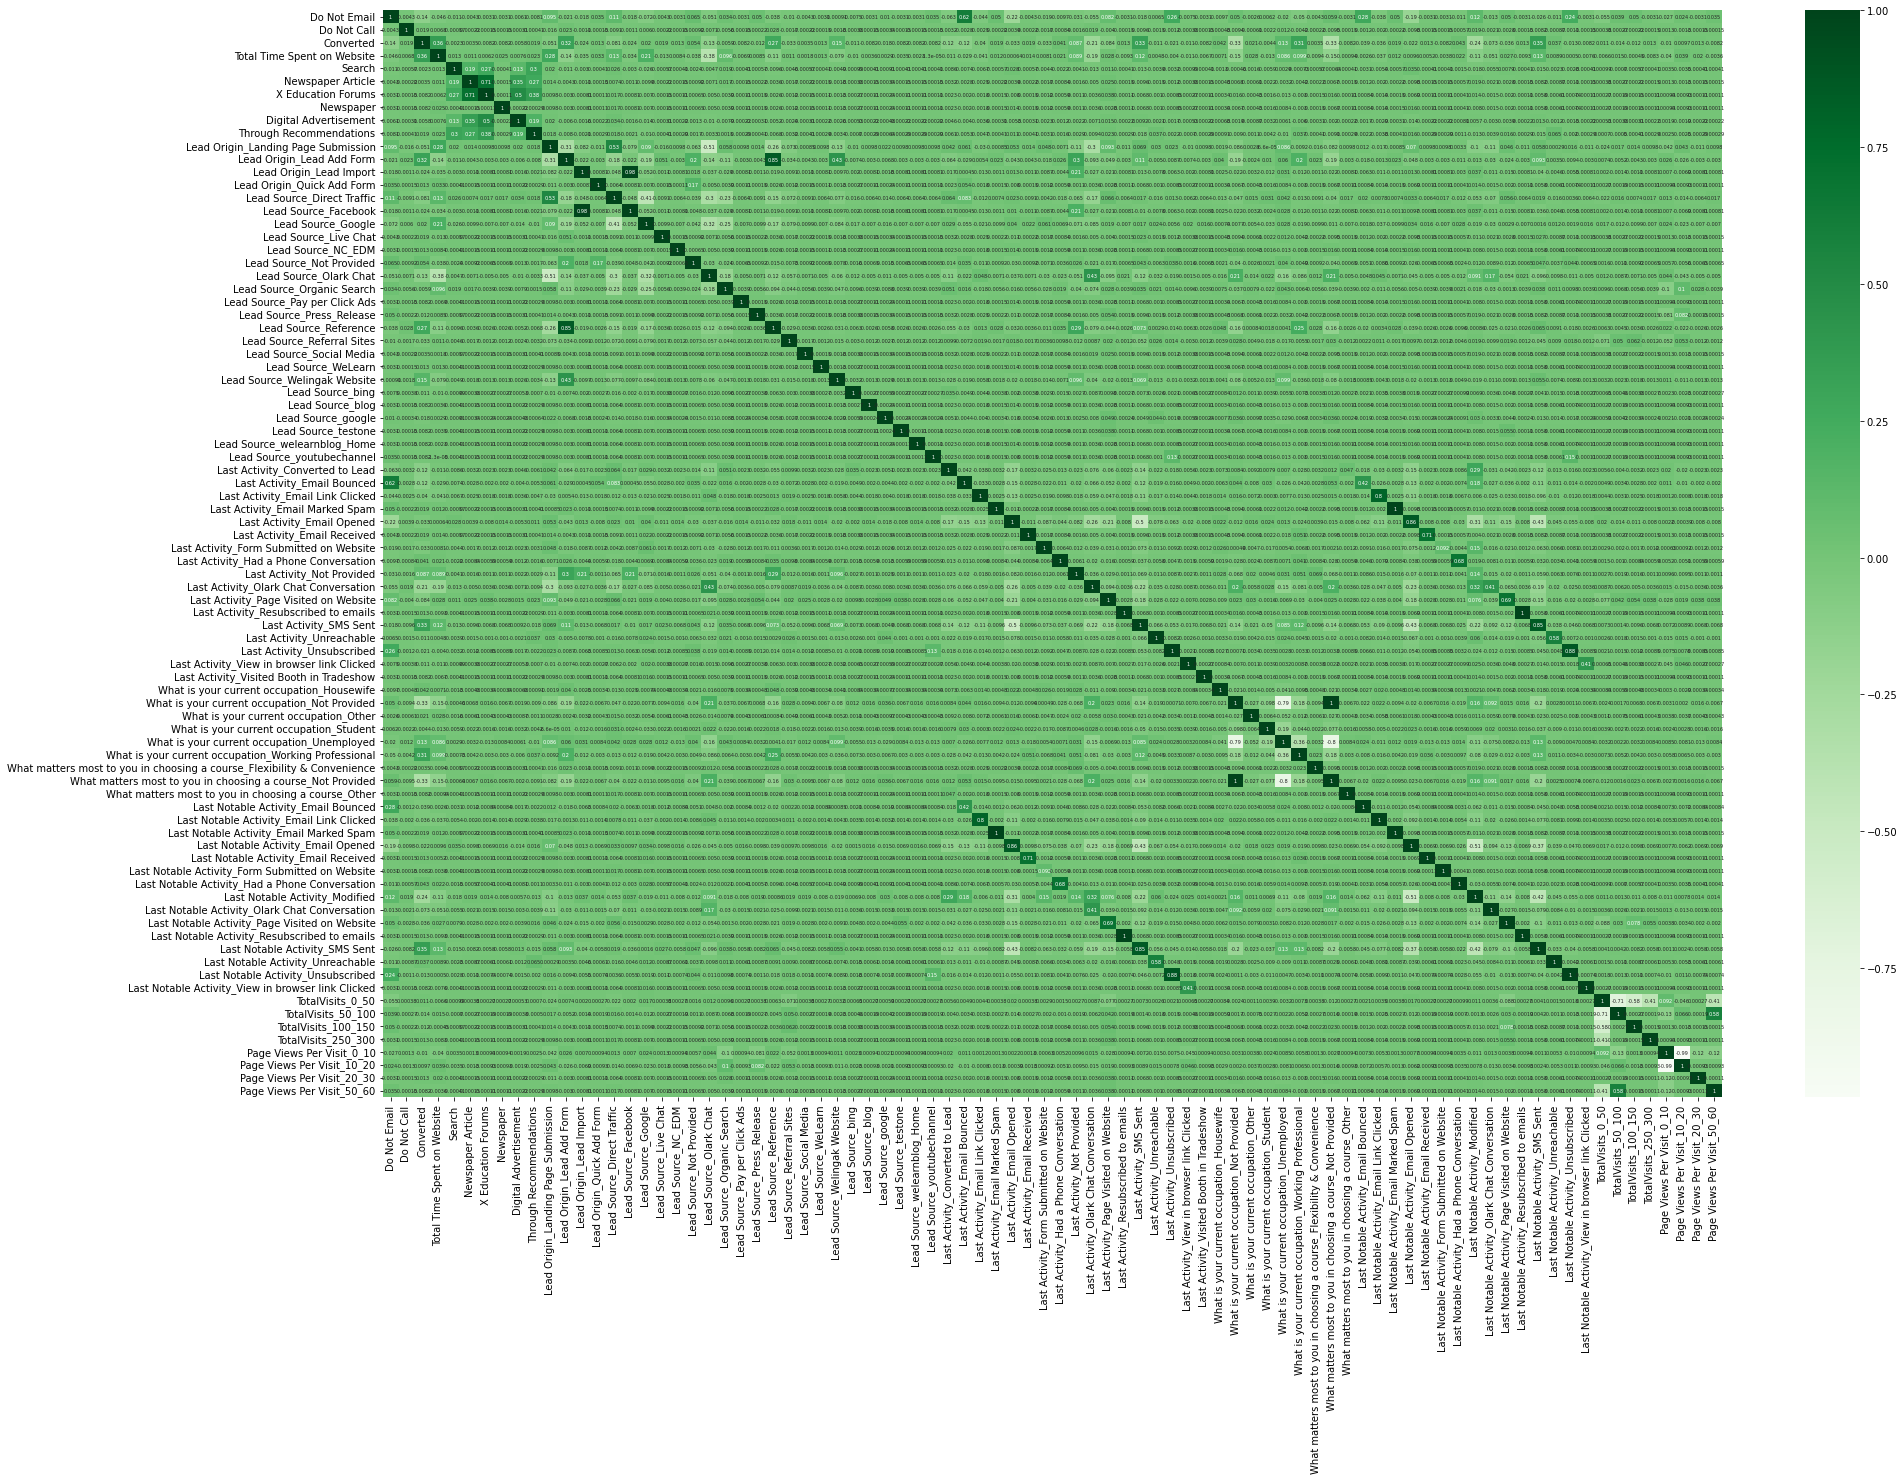

In [42]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))
sns.heatmap(Data.corr(),annot_kws={'size': 5},annot=True, cmap='Greens')
plt.show()

### Step 8: Model Building

In [43]:
# importing necessary library

import statsmodels.api as sm

In [44]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
logis.fit().summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['familt']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6391
Model Family:                Gaussian   Df Model:                           76
Link Function:               identity   Scale:                         0.13269
Method:                          IRLS   Log-Likelihood:                -2606.5
Date:                Tue, 18 Oct 2022   Deviance:                       847.85
Time:                        15:30:56   Pearson chi2:                     848.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5462
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.6729      0.252      2.673      0.008       0.180       1.166
Do Not Email                                                               -0.1097      0.024     -4.540      0.000      -0.157      -0.062
Do Not Call                                                                 0.4219      0.258      1.634      0.102      -0.084       0.928
Total Time Spent on Website                                                 0.7540      0.022     34.737      0.000       0.711       0.797
Search                                                                      0.0792      0.120      0.663      0.507      -0.155       0.313
Newspaper Article                                                           0.5671      0.365      1.554      0.120      -0.148       1.283
X Education Forums                                                         -0.4821      0.602     -0.801      0.423      -1.661       0.697
Newspaper                                                                  -0.7211      0.365     -1.978      0.048      -1.436      -0.006
Digital Advertisement                                                      -0.4034      0.258     -1.564      0.118      -0.909       0.102
Through Recommendations                                                     0.1150      0.155      0.742      0.458      -0.189       0.419
Lead Origin_Landing Page Submission                                        -0.0300      0.013     -2.243      0.025      -0.056      -0.004
Lead Origin_Lead Add Form                                                   0.3724      0.196      1.903      0.057      -0.011       0.756
Lead Origin_Lead Import                                                     0.1207      0.281      0.430      0.667      -0.430       0.671
Lead Origin_Quick Add Form                                                  0.1793      0.419      0.428      0.669      -0.643       1.001
Lead Source_Direct Traffic                                                 -0.0681      0.288     -0.237      0.813      -0.632       0.496
Lead Source_Facebook                                                       -0.1468      0.352     -0.417      0.676      -0.836       0.542
Lead Source_Google                                                         -0.0127      0.287     -0.044      0.965      -0.576       0.551
Lead Source_Live Chat                                                       0.1966      0.333      0.591      0.555      -0.456       0.849
Lead Source_NC_EDM                                                          0.6523      0.464      1.405      0.160      -0.258       1.562
Lea

### Step 9: Feature Selection Using RFE

In [45]:
# Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg=LogisticRegression()                 # creating an object

In [46]:
# Running rfe for 19 variables

rfem = RFE(logreg,n_features_to_select=19)

rfem = rfem.fit(X_train,y_train)   # fitting 

In [47]:
rfem.support_  # checking for ture and false assigned to the variables after rfe

array([ True, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False])

In [48]:
# selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model

col=X_train.columns[rfem.support_]

X_train_1=sm.add_constant(X_train[col])    # Adding constant

In [49]:
# creating 1st model after RFE

logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

reg1=logis1.fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.1
Date:                Tue, 18 Oct 2022   Deviance:                       5184.1
Time:                        15:31:02   Pearson chi2:                 6.78e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4101
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2084      0.128    -17.320      0.000      -2.458      -1.959
Do Not Email                                                  -1.0609      0.173     -6.126      0.000      -1.400      -0.721
Total Time Spent on Website                                    4.5979      0.167     27.452      0.000       4.270       4.926
Newspaper                                                    -24.2773   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                      3.4926      0.189     18.494      0.000       3.122       3.863
Lead Source_Olark Chat                                         1.2429      0.103     12.061      0.000       1.041       1.445
Lead Source_Welingak Website                                   1.9147      0.742      2.581      0.010       0.461       3.369
Last Activity_Email Opened                                     1.0061      0.156      6.430      0.000       0.699       1.313
Last Activity_Had a Phone Conversation                         1.4991      0.962      1.558      0.119      -0.387       3.385
Last Activity_Resubscribed to emails                          24.6161   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                         1.4753      0.114     12.972      0.000       1.252       1.698
What is your current occupation_Housewife                     22.8713   1.38e+04      0.002      0.999    -2.7e+04    2.71e+04
What is your current occupation_Working Professional           2.5613      0.190     13.496      0.000       2.189       2.933
What matters most to you in choosing a course_Not Provided    -1.0845      0.088    -12.377      0.000      -1.256      -0.913
Last Notable Activity_Email Opened                            -0.7535      0.181     -4.172      0.000      -1.107      -0.399
Last Notable Activity_Had a Phone Conversation                 2.1729      1.471      1.477      0.140      -0.711       5.056
Last Notable Activity_Modified                                -0.9849      0.113     -8.739      0.000      -1.206      -0.764
Last Notable Activity_Olark Chat Conversation                 -0.8614      0.346     -2.488      0.013      -1.540      -0.183
Last Notable Activity_Unreachable                              2.0570      0.545      3.777      0.000       0.990       3.124
TotalVisits_250_300                                           24.6754   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
==============================================================================================================================
"""

- There are some variables with high p values and insignificant values
- Hence we will drop such values one after another

#### Checking VIFs

In [50]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:

vif=pd.DataFrame()

vif['Features']=X_train_1[col].columns  
vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,7.28
6,Last Activity_Email Opened,7.19
7,Last Activity_Had a Phone Conversation,2.03
14,Last Notable Activity_Had a Phone Conversation,2.01
15,Last Notable Activity_Modified,1.98
1,Total Time Spent on Website,1.93
12,What matters most to you in choosing a course_...,1.59
9,Last Activity_SMS Sent,1.55
3,Lead Origin_Lead Add Form,1.46
4,Lead Source_Olark Chat,1.45


In [52]:
# Dropping the most insignificant values

X_train_2=X_train_1.drop(['const','What is your current occupation_Housewife','Last Notable Activity_Email Opened','Last Activity_Email Opened'],1)

In [53]:
# Creating a new model

X_train_2=sm.add_constant(X_train_2)                              # Adding constant
logis2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())  # Using GLM, creating model
reg2=logis2.fit()                                                 # Fitting our model
reg2.summary()                                                    # Showing the summary of the model created

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.13449
Method:                          IRLS   Log-Likelihood:                -2680.9
Date:                Tue, 18 Oct 2022   Deviance:                       867.59
Time:                        15:31:03   Pearson chi2:                     868.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5308
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.1585      0.010     15.822      0.000       0.139       0.178
Do Not Email                                                  -0.1154      0.017     -6.698      0.000      -0.149      -0.082
Total Time Spent on Website                                    0.7636      0.021     35.947      0.000       0.722       0.805
Newspaper                                                     -0.7674      0.367     -2.091      0.037      -1.487      -0.048
Lead Origin_Lead Add Form                                      0.5229      0.020     26.486      0.000       0.484       0.562
Lead Source_Olark Chat                                         0.1746      0.013     13.296      0.000       0.149       0.200
Lead Source_Welingak Website                                   0.1799      0.043      4.206      0.000       0.096       0.264
Last Activity_Had a Phone Conversation                         0.1540      0.111      1.385      0.166      -0.064       0.372
Last Activity_Resubscribed to emails                           0.8211      0.367      2.237      0.025       0.102       1.540
Last Activity_SMS Sent                                         0.2008      0.010     19.176      0.000       0.180       0.221
What is your current occupation_Working Professional           0.3176      0.018     17.713      0.000       0.282       0.353
What matters most to you in choosing a course_Not Provided    -0.1542      0.011    -14.369      0.000      -0.175      -0.133
Last Notable Activity_Had a Phone Conversation                 0.2848      0.157      1.815      0.069      -0.023       0.592
Last Notable Activity_Modified                                -0.1280      0.010    -12.739      0.000      -0.148      -0.108
Last Notable Activity_Olark Chat Conversation                 -0.1416      0.035     -4.066      0.000      -0.210      -0.073
Last Notable Activity_Unreachable                              0.2924      0.080      3.638      0.000       0.135       0.450
TotalVisits_250_300                                            0.8251      0.367      2.249      0.025       0.106       1.544
==============================================================================================================================
"""

In [54]:
# Dropping the most insignificant values ('Last Activity_Had a Phone Conversation') and constant

X_train_3=X_train_2.drop(['const','Last Activity_Had a Phone Conversation'],1)

In [55]:
# Recreating a new model

X_train_3=sm.add_constant(X_train_3)                                # Adding constant
logis3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())    # Using GLM, creating model
reg3=logis3.fit()                                                   # Fitting our model
reg3.summary()                                                      # Showing the summary of the model created

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.13451
Method:                          IRLS   Log-Likelihood:                -2681.9
Date:                Tue, 18 Oct 2022   Deviance:                       867.85
Time:                        15:31:03   Pearson chi2:                     868.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5306
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.1584      0.010     15.814      0.000       0.139       0.178
Do Not Email                                                  -0.1154      0.017     -6.700      0.000      -0.149      -0.082
Total Time Spent on Website                                    0.7640      0.021     35.973      0.000       0.722       0.806
Newspaper                                                     -0.7677      0.367     -2.092      0.036      -1.487      -0.048
Lead Origin_Lead Add Form                                      0.5239      0.020     26.554      0.000       0.485       0.563
Lead Source_Olark Chat                                         0.1744      0.013     13.282      0.000       0.149       0.200
Lead Source_Welingak Website                                   0.1789      0.043      4.183      0.000       0.095       0.263
Last Activity_Resubscribed to emails                           0.8215      0.367      2.238      0.025       0.102       1.541
Last Activity_SMS Sent                                         0.2004      0.010     19.143      0.000       0.180       0.221
What is your current occupation_Working Professional           0.3188      0.018     17.803      0.000       0.284       0.354
What matters most to you in choosing a course_Not Provided    -0.1543      0.011    -14.383      0.000      -0.175      -0.133
Last Notable Activity_Had a Phone Conversation                 0.4385      0.111      3.956      0.000       0.221       0.656
Last Notable Activity_Modified                                -0.1272      0.010    -12.681      0.000      -0.147      -0.108
Last Notable Activity_Olark Chat Conversation                 -0.1414      0.035     -4.060      0.000      -0.210      -0.073
Last Notable Activity_Unreachable                              0.2922      0.080      3.637      0.000       0.135       0.450
TotalVisits_250_300                                            0.8251      0.367      2.249      0.025       0.106       1.544
==============================================================================================================================
"""

### Checking VIF

In [56]:
# Checking VIF again just to be sure

X_train_3_1=X_train_3.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_3_1.columns       # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_3_1.values,i) for i in range(X_train_3_1.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
11,Last Notable Activity_Modified,1.53
1,Total Time Spent on Website,1.48
9,What matters most to you in choosing a course_...,1.46
3,Lead Origin_Lead Add Form,1.40
7,Last Activity_SMS Sent,1.38
4,Lead Source_Olark Chat,1.34
5,Lead Source_Welingak Website,1.24
8,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.10
12,Last Notable Activity_Olark Chat Conversation,1.07


### Predicting Train Model

In [57]:
# Predicting the train dataset with our final model

y_train_pred=reg3.predict(X_train_3)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows


,Converted,Converted_probability,ID
1871,0,0.332817,1871
6795,0,0.322161,6795
3516,0,0.368464,3516
8105,0,0.772393,8105
3934,0,0.205611,3934


### Step 10: Plotting the ROC Curve

In [58]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def edu_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

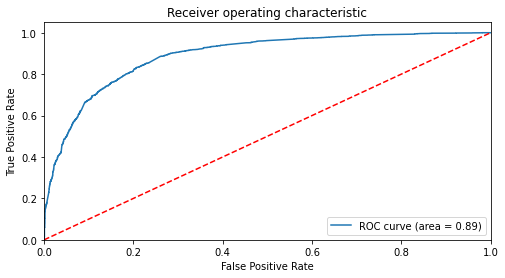

In [59]:
# Calling the roc curve for plotting

edu_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Area under the curve is 89% and it is towards the left side of the border

### Step 11: Finding Optimal Cutoff Point

In [60]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.332817,1871,1,1,1,1,0,0,0,0,0,0
6795,0,0.322161,6795,1,1,1,1,0,0,0,0,0,0
3516,0,0.368464,3516,1,1,1,1,0,0,0,0,0,0
8105,0,0.772393,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.205611,3934,1,1,1,0,0,0,0,0,0,0


In [61]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.440940    0.997972     0.097701
0.1          0.1  0.585652    0.981346     0.341829
0.2          0.2  0.696815    0.951744     0.539730
0.3          0.3  0.786333    0.900649     0.715892
0.4          0.4  0.810451    0.798054     0.818091
0.5          0.5  0.815399    0.688159     0.893803
0.6          0.6  0.789734    0.547445     0.939030
0.7          0.7  0.754638    0.412814     0.965267
0.8          0.8  0.721088    0.296837     0.982509
0.9          0.9  0.681664    0.173966     0.994503


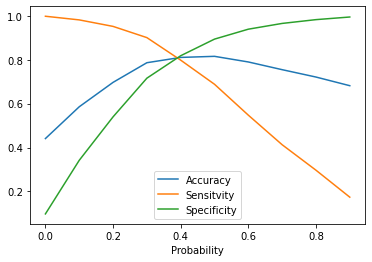

In [62]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()

In [63]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.332817,1871,1,1,1,1,0,0,0,0,0,0,0
6795,0,0.322161,6795,1,1,1,1,0,0,0,0,0,0,0
3516,0,0.368464,3516,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.772393,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.205611,3934,1,1,1,0,0,0,0,0,0,0,0


## Precision and Recall

In [64]:
# Predicting the train dataset with our final model - rfe with 15 variables

y_train_pred1=reg3.predict(X_train_3)

# Creating a new dataset and saving predicted values in it

y_train_pred_final2=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred1,'ID':y_train.index})

y_train_pred_final2.head()   # viewing first 5 rows


,Converted,Converted_probability,ID
1871,0,0.332817,1871
6795,0,0.322161,6795
3516,0,0.368464,3516
8105,0,0.772393,8105
3934,0,0.205611,3934


### ROC PLOTTING

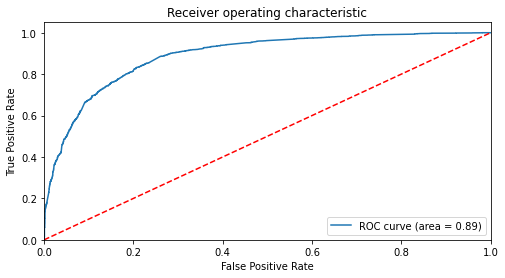

In [65]:
# Calling the roc curve function for plotting

edu_roc(y_train_pred_final2.Converted, y_train_pred_final2.Converted_probability)

### Step 12: Making predictions on the test set

In [66]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[['Total Time Spent on Website']] = scaler.fit_transform(X_test[['Total Time Spent on Website']])

### Now predicting

In [67]:
# Predicting the test dataset with our final model

test_cols=X_train_3.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=reg3.predict(X_test_final)       # Predicting the final test set

In [68]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.547283,4269
2376,1,0.882633,2376
7766,1,0.789484,7766
9199,0,0.205611,9199
4359,1,0.682263,4359


In [69]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.547283,4269,1
2376,1,0.882633,2376,1
7766,1,0.789484,7766,1
9199,0,0.205611,9199,0
4359,1,0.682263,4359,1


In [70]:
# Checking the accuracy of the test dataset.

from sklearn import metrics    # Importing metrics from sklearn

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the score

Accuracy score in predicting test dataset : 0.8134920634920635


In [71]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the precision score

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))      # Printing the recall score

Precision score in predicting test dataset: 0.747008547008547
Recall score in predicting test dataset: 0.7981735159817351


### Lead Score Assigning

In [72]:
# Creating new columns for lead number and lead score

y_test_pred_final['Lead Number']=Data.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))


y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.547283,4269,1,0,55
2376,1,0.882633,2376,1,0,88
7766,1,0.789484,7766,1,0,79
9199,0,0.205611,9199,0,0,21
4359,1,0.682263,4359,1,0,68


### Insights 

 - The Accuracy, Precision and Recall score we got from test set is in acceptable range.
 - We have high recall score than precision score which we were exactly looking for.
 - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 - This concludes that the model is in stable state.
 - Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead  getting converted are :
    - **Last Notable Activity_Had a Phone Conversation**
    - **Lead Origin_Lead Add Form** and
    - **What is your current occupation_Working Professional**